### Hypothesis Tests

### 04_01 - Exploring Data

Goals:

* Explore summary statistics by group


In [2]:
import numpy as np
import pandas as pd
pd.__version__

'2.0.2'

In [3]:
url = 'data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

housing = clean_housing(raw)

In [4]:
from scipy import stats
housing.Neighborhood.value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [5]:
(housing
 .groupby('Neighborhood')
 .describe())

Order                                                    \
              count         mean         std     min      25%     50%   
Neighborhood                                                            
Blmngtn        28.0  1500.000000  882.971205    53.0   473.75  1742.5   
Blueste        10.0  1187.800000   687.00021   299.0   933.25   935.5   
BrDale         30.0  1317.933333  852.662076    30.0   407.25  1045.5   
BrkSide       108.0  1465.037037  778.979802   130.0   742.75  1343.5   
ClearCr        44.0  1551.681818   895.21461   209.0   785.25  1405.0   
CollgCr       267.0  1683.273408  811.009037   250.0   867.50  1477.0   
Crawfor       103.0  1810.679612  778.304759   294.0   938.50  2199.0   
Edwards       194.0  1627.675258  852.935427   235.0   889.25  1502.5   
Gilbert       165.0  1285.254545  815.923617     5.0   479.00  1616.0   
Greens          8.0  1591.375000  1131.30417   107.0   459.00  2188.5   
GrnHill         2.0  2575.000000  449.719913  2257.0  2416.00  2575.0   
IDOTRR         93.0  1737.784946  798.086201   206.0  1361.00  1559.0   
Landmrk         1.0  2789.000000        <NA>  2789.0  2789.00  2789.0   
MeadowV        37.0  1779.243243  959.225452   327.0   978.00  1601.0   
Mitchel       114.0  1707.078947  884.002664   310.0   972.25  1604.5   
NAmes         443.0  1396.733634  847.035881     1.0   636.50  1266.0   
NPkVill        23.0   851.826087  790.536967    33.0   410.50   416.0   
NWAmes        131.0  1245.251908  775.591252    20.0   583.50  1188.0   
NoRidge        71.0  1337.154930  850.279595    60.0   502.50  1158.0   
NridgHt       166.0  1226.819277   789.81649    37.0   447.25  1073.5   
OldTown       239.0  1454.271967  832.683117   159.0   709.50  1314.0   
SWISU          48.0  1496.583333  962.873046   212.0   906.75  1518.5   
Sawyer        151.0  1543.794702  877.468262    84.0   772.50  1398.0   
SawyerW       125.0  1218.232000  807.823701    73.0   547.00  1135.0   
Somerst       182.0  1284.609890  780.019717    23.0   527.25  1168.5   
StoneBr        51.0  1326.568627  839.230392     7.0   368.50  1632.0   
Timber         72.0  1721.347222  801.830901   315.0   965.75  1584.5   
Veenker        24.0  1552.291667  636.580913   564.0  1179.75  1828.5   

                                 PID                ...  Yr Sold          \
                  75%     max  count          mean  ...      75%     max   
Neighborhood                                        ...                    
Blmngtn       2423.25  2430.0   28.0  5.282284e+08  ...  2009.00  2010.0   
Blueste       1543.75  2228.0   10.0  9.094523e+08  ...  2009.00  2010.0   
BrDale        2365.75  2373.0   30.0  5.274509e+08  ...  2009.00  2010.0   
BrkSide       2017.25  2688.0  108.0  8.486135e+08  ...  2009.00  2010.0   
ClearCr       2118.25  2768.0   44.0  9.054844e+08  ...  2009.00  2010.0   
CollgCr       2160.50  2816.0  267.0  9.070853e+08  ...  2009.00  2010.0   
Crawfor       2226.00  2885.0  103.0  9.095240e+08  ...  2009.00  2010.0   
Edwards       2188.75  2845.0  194.0  9.071216e+08  ...  2009.00  2010.0   
Gilbert       1757.00  2442.0  165.0  5.277561e+08  ...  2009.00  2010.0   
Greens        2520.25  2522.0    8.0  5.332531e+08  ...  2009.25  2010.0   
GrnHill       2734.00  2893.0    2.0  9.162527e+08  ...  2006.75  2007.0   
IDOTRR        2242.00  2883.0   93.0  9.086032e+08  ...  2008.00  2010.0   
Landmrk       2789.00  2789.0    1.0  9.072302e+08  ...  2006.00  2006.0   
MeadowV       2909.00  2921.0   37.0  9.232268e+08  ...  2009.00  2010.0   
Mitchel       2299.75  2930.0  114.0  9.206062e+08  ...  2009.00  2010.0   
NAmes         1961.50  2635.0  443.0  5.338416e+08  ...  2009.00  2010.0   
NPkVill       1365.00  2378.0   23.0  5.274536e+08  ...  2009.00  2010.0   
NWAmes        1866.50  2541.0  131.0  5.303630e+08  ...  2009.00  2010.0   
NoRidge       1833.50  2504.0   71.0  5.292254e+08  ...  2009.00  2010.0   
NridgHt       1717.75  2410.0  166.0  5.281454e+08  ...  2009.00  2010.0   
Ol

In [6]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['CollgCr', 'NAmes'], ['SalePrice']]
)

SalePrice                                                   \
                 count           mean           std       min       25%   
Neighborhood                                                              
CollgCr          267.0  201803.434457  54187.843749  110000.0  160875.0   
NAmes            443.0  145097.349887  31882.707229   68000.0  127000.0   

                                            
                   50%       75%       max  
Neighborhood                                
CollgCr       200000.0  228250.0  475000.0  
NAmes         140000.0  157500.0  345000.0

In [7]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['CollgCr', 'NAmes'], ['SalePrice']]
 .T
)

Neighborhood           CollgCr          NAmes
SalePrice count     267.000000     443.000000
          mean   201803.434457  145097.349887
          std     54187.843749   31882.707229
          min    110000.000000   68000.000000
          25%    160875.000000  127000.000000
          50%    200000.000000  140000.000000
          75%    228250.000000  157500.000000
          max    475000.000000  345000.000000

### 04_02 - Visualizing Distributions

Goals

* Make histograms of both distributions
* Make a cumulative distribution plot

In [8]:
n_ames = (housing
          .query('Neighborhood == "NAmes"')
          .SalePrice)
college_cr = (housing
          .query('Neighborhood == "CollgCr"')
          .SalePrice)

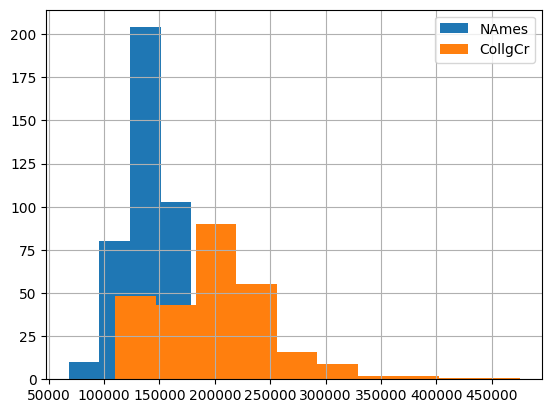

In [9]:
ax = n_ames.hist(label='NAmes')
college_cr.hist(ax=ax, label='CollgCr')
ax.legend()

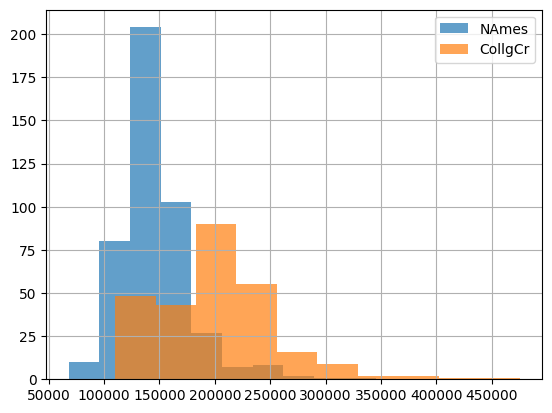

In [10]:
alpha = .7
ax = n_ames.hist(label='NAmes', alpha=alpha)
college_cr.hist(ax=ax, label='CollgCr', alpha=alpha)
ax.legend()

<Axes: xlabel='SalePrice'>

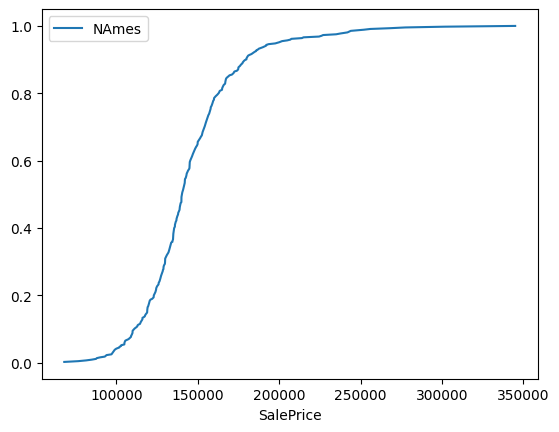

In [14]:
(n_ames
 .to_frame()
 .assign(cdf=n_ames.rank(method='average', pct=True))
 .sort_values(by='SalePrice')
 .plot(x='SalePrice', y='cdf', label='NAmes')
)

0       215000
1       105000
2       172000
3       244000
23      149000
         ...  
2630    155000
2631    134500
2632    120000
2633    105000
2634    124000
Name: SalePrice, Length: 443, dtype: uint32[pyarrow]

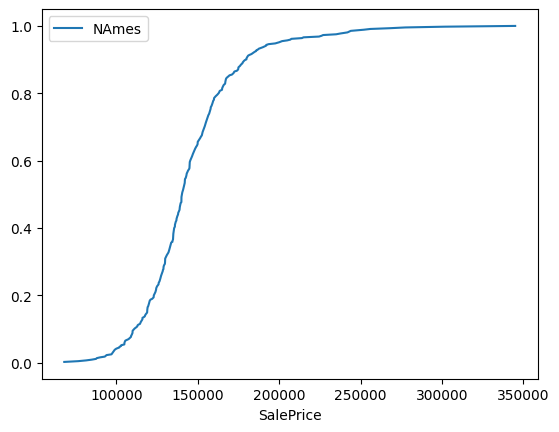

In [15]:
import matplotlib.pyplot as plt

def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
plot_cdf(n_ames, label='NAmes')

249     245350
250     206000
251     198900
252     187000
256     159000
         ...  
2811    196500
2812    198000
2813    173900
2814    163990
2815    164990
Name: SalePrice, Length: 267, dtype: uint32[pyarrow]

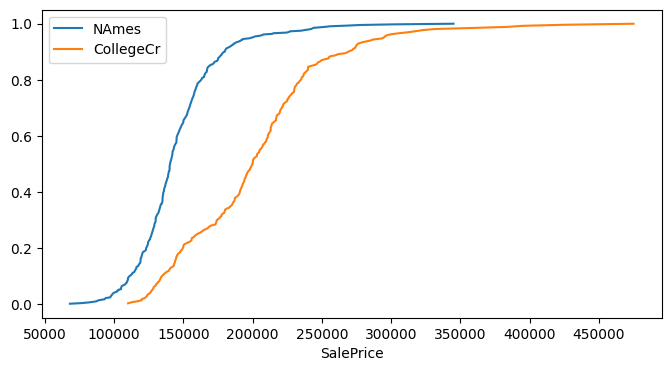

In [16]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
    
fig, ax = plt.subplots(figsize=(8,4))
plot_cdf(n_ames, label='NAmes', ax=ax)
plot_cdf(college_cr, label='CollegeCr', ax=ax)

### 04_03 - Running Statistical Tests

Goals:

* Use the `scipy.stats` module to run a statistical test

In [17]:
print(dir(stats))

['ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'NearConstantInputWarning', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sobol', '_statlib', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_tukeylambda_stats', '_variation', '_warnings_errors', 'alexandergovern', 'alpha', 'anderson', 'anderson_ksamp', 'anglit', 'ansari', 'arcsine', 'argus', 'barnard_exact', 'bartlett', 'bayes

In [18]:
stats.ks_2samp?

Signature: stats.ks_2samp(data1, data2, alternative='two-sided', method='auto')
Docstring:
Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.

This test compares the underlying continuous distributions F(x) and G(x)
of two independent samples.  See Notes for a description of the available
null and alternative hypotheses.

Parameters
----------
data1, data2 : array_like, 1-Dimensional
    Two arrays of sample observations assumed to be drawn from a continuous
    distribution, sample sizes can be different.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the null and alternative hypotheses. Default is 'two-sided'.
    Please see explanations in the Notes below.
method : {'auto', 'exact', 'asymp'}, optional
    Defines the method used for calculating the p-value.
    The following options are available (default is 'auto'):

      * 'auto' : use 'exact' for small size arrays, 'asymp' for large
      * 'exact' : use exact distribution of test statisti

In [19]:
ks_statistic, p_value = stats.ks_2samp(n_ames, college_cr)
print(ks_statistic, p_value)

0.5836609430085982 3.2892428354379855e-53


In [20]:
if p_value > 0.05:
    print('Fail to reject null hypothesis: Same distribution')
else:
    print('Reject null hypothesis: Not from the same distribution')


Reject null hypothesis: Not from the same distribution


### 04_04 - Testing for Normality

Goals:

* Use the `scipy.stats` module to test for normality
* Use the `scipy.stats` module to create a probability plot

In [21]:
# Use the Shapiro-Wilks test
shapiro_stat, p_value = stats.shapiro(n_ames)

In [22]:
if p_value > 0.05:
    print("The distribution of the series is likely normal (fail to reject H0)")
else:
    print("The distribution of the series is likely not normal (reject H0)")


The distribution of the series is likely not normal (reject H0)


In [23]:
p_value

5.124703517354697e-17

In [24]:
stats.probplot?

Signature:
stats.probplot(
    x,
    sparams=(),
    dist='norm',
    fit=True,
    plot=None,
    rvalue=False,
)
Docstring:
Calculate quantiles for a probability plot, and optionally show the plot.

Generates a probability plot of sample data against the quantiles of a
specified theoretical distribution (the normal distribution by default).
`probplot` optionally calculates a best-fit line for the data and plots the
results using Matplotlib or a given plot function.

Parameters
----------
x : array_like
    Sample/response data from which `probplot` creates the plot.
sparams : tuple, optional
    Distribution-specific shape parameters (shape parameters plus location
    and scale).
dist : str or stats.distributions instance, optional
    Distribution or distribution function name. The default is 'norm' for a
    normal probability plot.  Objects that look enough like a
    stats.distributions instance (i.e. they have a ``ppf`` method) are also
    accepted.
fit : bool, optional
    F

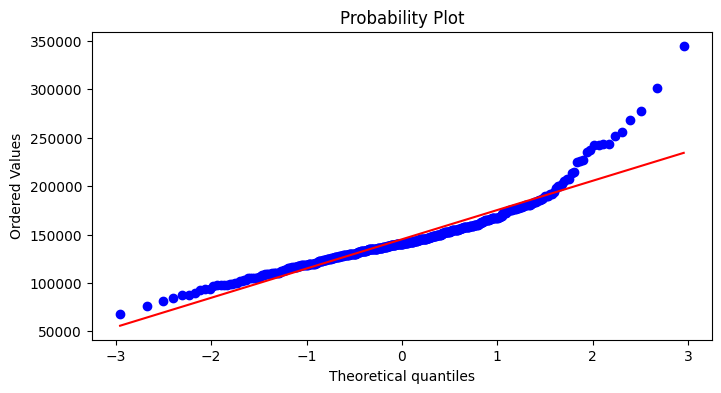

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(n_ames, plot=ax)

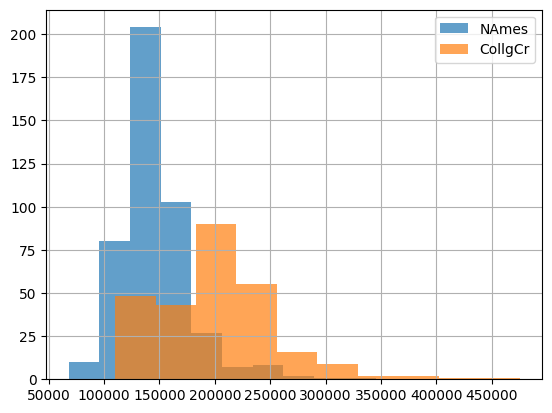

In [26]:
alpha = .7
ax = n_ames.hist(label='NAmes', alpha=alpha)
college_cr.hist(ax=ax, label='CollgCr', alpha=alpha)
ax.legend()

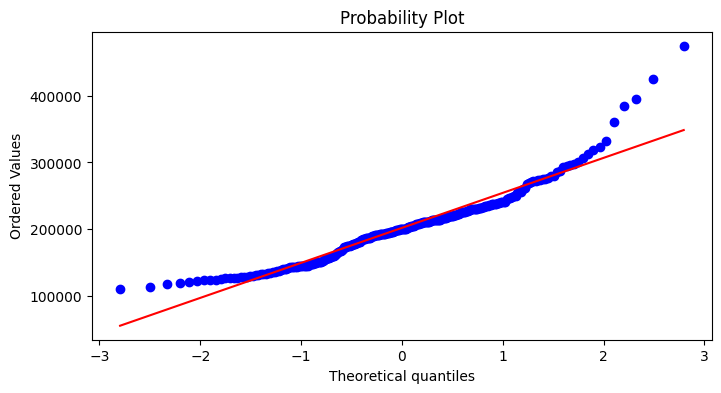

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(college_cr, plot=ax)

### 04_05 - Challenge: Checking Square Footage Distributions
* Is the distribution of *1st Flr SF* from *NAmes* and *CollgCr* the same?

In [36]:
# 04_06
n_ames_sf = (housing
 .query('Neighborhood == "NAmes"')
 .loc[:, '1st Flr SF']
)
college_cr_sf = (housing
 .query('Neighborhood == "CollgCr"')
 .loc[:, '1st Flr SF']
)                

<Axes: >

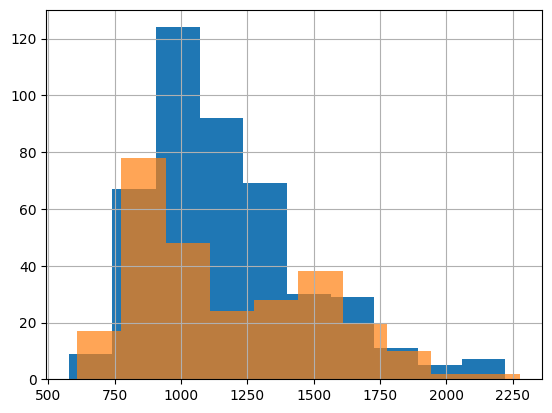

In [37]:
ax = n_ames_sf.hist()
college_cr_sf.hist(ax=ax, alpha=.7)

In [38]:
ks, p_value = stats.ks_2samp(n_ames_sf, college_cr_sf)
p_value

0.0007057410997705426